Goal is to predict gene family from DNA sequence. We are using human DNA sequence.

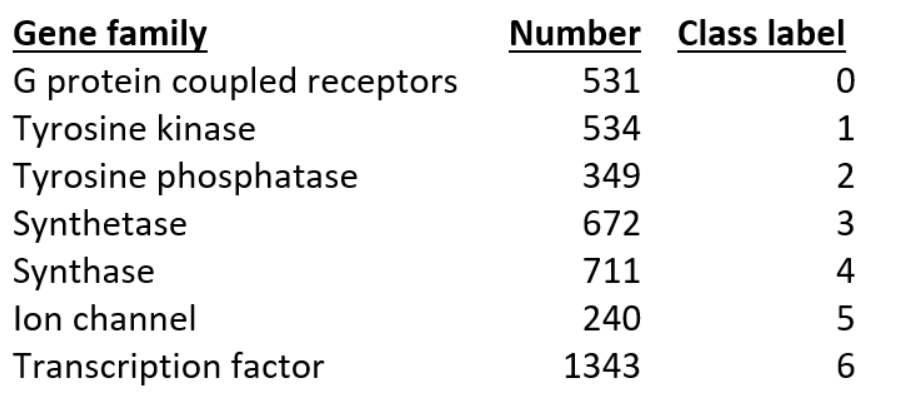

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
df = pd.read_table('/kaggle/input/humandnadata/human_data/human_data.txt')
df.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


There are 7 gene classes, and the class with highest number of samples is class 6, Transcription factor.

In [6]:
df['class'].value_counts()

class
6    1343
4     711
3     672
1     534
0     531
2     349
5     240
Name: count, dtype: int64

# Preprocessing

In [7]:
def getKmers(sequence, size=6):
    """Convert sequence of str into k-mer words"""
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

## 1. Convert DNA sequence into k-mer words

In [9]:
# Convert dna sequence into k-mer words
df['kmer6'] = df['sequence'].apply(getKmers)

In [25]:
df['kmer6_joined'] = df['kmer6'].apply(lambda x: ' '.join(x))

## 2. CountVectorizer to get frequency of most important kmers

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(list(df['kmer6_joined']))

In [51]:
cv.get_feature_names_out()

array(['aaaaaa aaaaaa aaaaaa aaaaaa', 'aaaaaa aaaaaa aaaaaa aaaaac',
       'aaaaaa aaaaaa aaaaaa aaaaag', ..., 'tttttt tttttt tttttt tttttc',
       'tttttt tttttt tttttt tttttg', 'tttttt tttttt tttttt tttttt'],
      dtype=object)

In [26]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df['kmer6_joined'])
# tfidf.get_feature_names_out()

array(['aaaaaa', 'aaaaac', 'aaaaag', ..., 'tttttc', 'tttttg', 'tttttt'],
      dtype=object)

In [37]:
print(X.shape)

(4380, 4469)


In [36]:
print(pd.DataFrame(X)[0][0])

  (0, 3815)	0.07231043564857281
  (0, 860)	0.07154080002147954
  (0, 215)	0.06606175800148718
  (0, 1077)	0.07375956630994285
  (0, 269)	0.0727044801518127
  (0, 1091)	0.06824808045470178
  (0, 1296)	0.057346520656644896
  (0, 1348)	0.05292041032810571
  (0, 1361)	0.052030649969014194
  (0, 2389)	0.050008591882899654
  (0, 4362)	0.05879199304676186
  (0, 997)	0.05850047840555816
  (0, 1273)	0.05556237599037102
  (0, 3763)	0.052690533026322685
  (0, 979)	0.06591063367350258
  (0, 1268)	0.05964112127122479
  (0, 3762)	0.06372104185570254
  (0, 4292)	0.12592218387449455
  (0, 2003)	0.050135170544731864
  (0, 2548)	0.051521917667465174
  (0, 1661)	0.06358360242149767
  (0, 3860)	0.08143466060232797
  (0, 4316)	0.07647486113310979
  (0, 3033)	0.08271374972926357
  (0, 4203)	0.0751674080089538
  :	:
  (0, 4106)	0.04689955609362688
  (0, 933)	0.05153870691411172
  (0, 3678)	0.06108363756435535
  (0, 2874)	0.06442000451998882
  (0, 1742)	0.09769702777568359
  (0, 1459)	0.09499691623923237
  (0

## 3. Prepare dataset

In [52]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    df['class'], 
                                                    test_size = 0.20, 
                                                    random_state=42)

## 4. Train model

### 4.1 MultinomialNB [f1 = 0.984]

In [53]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [54]:
y_pred = clf.predict(X_test)


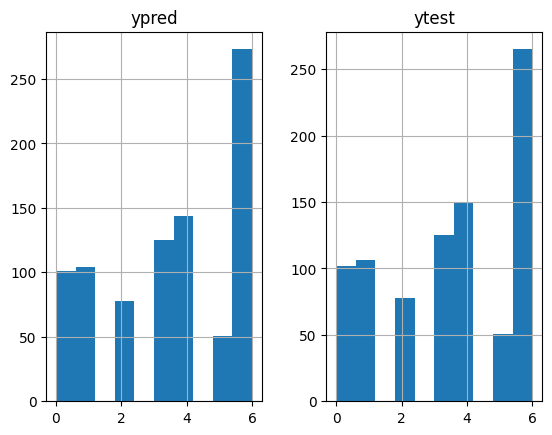

In [55]:
fig, axs = plt.subplots(1,2)
pd.DataFrame(y_pred).hist(ax=axs[0])
pd.DataFrame(y_test).hist(ax=axs[1])

axs[0].set_title('ypred')
axs[1].set_title('ytest');

In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  0  1  2  3   4  5   6
Actual                          
0          1  0  1  3   2  3   7
1          3  4  1  7  12  3   4
2          1  1  1  3   5  1   7
3          3  2  1  3   5  1   6
4          3  6  4  4   3  4  10
5          2  3  1  1   2  0   1
6          6  8  7  9   7  4  16
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


### 4.2 XGBClassifier [f1 = 0.900]

In [57]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state = 1)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
y_pred_xg = xg.predict(X_test)


In [60]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred_xg, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_xg)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  0  1  2  3   4  5   6
Actual                          
0          1  0  1  3   2  3   7
1          2  3  1  6  12  3   7
2          1  0  1  2   5  1   9
3          1  2  1  4   4  1   8
4          2  6  4  3   3  3  13
5          2  2  1  1   2  0   2
6          4  6  5  9   6  3  24
accuracy = 0.898 
precision = 0.912 
recall = 0.898 
f1 = 0.900


### 4.3 LGBMClassifier [f1 = 0.912]

In [66]:
from lightgbm import LGBMClassifier

lg = LGBMClassifier(random_state = 1)
lg.fit(X_train.astype('float'), y_train.astype('float'))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 6.409932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169978
[LightGBM] [Info] Number of data points in the train set: 3504, number of used features: 77169
[LightGBM] [Info] Start training from score -2.100204
[LightGBM] [Info] Start training from score -2.102537
[LightGBM] [Info] Start training from score -2.559542
[LightGBM] [Info] Start training from score -1.857212
[LightGBM] [Info] Start training from score -1.830159
[LightGBM] [Info] Start training from score -2.919913
[LightGBM] [Info] Start training from score -1.178798


LGBMClassifier(random_state=1)

In [70]:
y_pred_lg = lg.predict(X_test.astype('float'))


In [71]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred_lg, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_lg)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0
Actual                                      
0            1    0    1    3    1    3    8
1            2    3    1    7   12    3    6
2            1    0    1    3    5    1    8
3            1    2    1    4    4    1    8
4            3    6    4    3    4    3   11
5            2    3    1    2    1    0    1
6            5    6    6   10    6    3   21
accuracy = 0.912 
precision = 0.920 
recall = 0.912 
f1 = 0.912


# Conclusion

- Trained 3 models (MultinomialNB, XGBoost, LightGBM).
- Used 2 NLP processing techniques (CountVectorizer, TFIDF) -- CountVectorizer performed better than TFIDF.
- All trained model has >= 90% F1 score.
- We can predict gene class from DNA sequence with high accuracy.